# Data mining final project
* Name : Tal Tubul
* I.D : 208835355
* Email : taltub123@gmail.com

# pre-processing
1. Import and dawnload packages.
2. Uploading the text _chat.
3. Text into structure.
4. Extract feature from the text.
5. data handling.
6. outliers.
7. Bag of words.


In [13]:
# --------------------------------------
import pandas as pd
import numpy as np
import io
import textblob
from textblob import TextBlob
# --------------------------------------

# visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter
#-------------------------------------------
#tokenizer:
import wordcloud
import nltk
import nltk.util
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.text import Text
from nltk.util import ngrams
from nltk.corpus import stopwords
nltk.download('stopwords')
# --------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.manifold import TSNE

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import dendrogram, linkage
# ---------------------------------------

# output and visualizations:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
 # word net installation:
 #!pip install wn
 #!python -m wn download omw-he:1.4
 #!pip install hebrew_tokenizer
 #!pip install numpy
#!pip install hebrew_tokenizer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for hebrew_tokenizer: filename=hebrew_tokenizer-2.3.0-py3-none-any.whl size=13424 sha256=d7c8a6d0485cb3473273131af4e240aebff90f83d97268676c154463a3b7728d
  Stored in directory: c:\users\tal\appdata\local\pip\cache\wheels\e2\7d\65\86a00f98ea3dace8b53561300be8a0a73a41a6b5d0cd34a1f2
Successfully built hebrew_tokenizer



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# --------------------------------------
# Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------
# word net import:
import wn
# Hebrew tokenizer import:
import hebrew_tokenizer as ht

c:\Users\Tal\Desktop\לימודים\כריית נתונים\פרויקט סוף


### Reading input files
Reading file to string

In [19]:
path = 'C:\\Users\\Tal\\Desktop\\לימודים\\כריית נתונים\\פרויקט סוף\\'
chat_filename = '_chat.txt'
try:
    with open(path + chat_filename, 'r', encoding='utf-8') as file:
        file_contents = file.read()
        print("File contents:", file_contents)
except FileNotFoundError:
    print("File not found.")
#except Exception as e:
    #print("Error:", e)


File contents: [11.7.2023, 6:56:49] כו"ח - על כל שאלה תשובה 🎼: ‏ההודעות והשיחות מוצפנות מקצה לקצה. לאף אחד מחוץ לצ'אט הזה, גם לא ל-WhatsApp, אין אפשרות לקרוא אותן ולהאזין להן.
[21.8.2023, 17:32:38] רועי מרלי: ‏סקר:
חברת *שידורית* זכתה במכרז של משרד הרווחה לאספקת שירותי *תרגום מרחוק בשפת הסימנים* לזכאים בלבד. האם את/ה מכיר/ה את השירות המוצע בשפת הסימנים (לא תיווך בכתב). נבקש כי רק חירשים וכבדי שמיעה יענו.
‏אפשרות: כן - השירות טוב (0 הצבעות)
‏אפשרות: כן - השירות לא טוב (הצבעה אחת)
‏אפשרות: לא מכיר את השירות (14 הצבעות)
[8.10.2023, 22:22:51] יעל גורן (מפילדלפיה): האם יש אפשרות באפליקציה לשנות את צליל ההתראה מסירנה למשהו אחר? לא מצאתי אופציה כזו. 
בצבע אדום כן היה. 
זה פשוט עושה התקף לב הצליל של סירנה באמצע שינה. 
מחפשת משהו שישמע יותר כמו שעון מעורר. אבל אין אופציה לשנות בתפריט אלא אם מישהו כאן מכיר.
[22.10.2023, 23:15:45] יניב פיבו: ‫‏לירית שפיר שמש הסיר/ה את יניב פיבו‬
[22.10.2023, 23:20:16] ~ M.B.N. ltd: ‫‏לירית שפיר שמש הסיר/ה את ~ M.B.N. ltd‬
[22.10.2023, 23:22:43] ~ Maya: ‫‏לירית שפ

1) a) Organizing the string to a data stracture.

In [20]:
# Split the long string into individual messages
cleaned_contect = file_contents.replace('\u200f', '').replace('\u202b', '').replace('\u202c', '').replace('\u202f', '') 
messages = cleaned_contect.strip().split('\n[')
messages[0] = messages[0].replace('[', '')


1) b)  I had one outlier so I fixed it manually.

In [21]:
messages[421] = messages[421] + '\n[' + messages[422]
messages.pop(422) 

'תודה ליהונתן שיוביץ על הכנת הסרטון!]\nהוראות כתובות: ללחוץ על הגדרות - להגיע לנגישות - להגיע לשמיעה/ראייה - לגלול למטה אל הבהוב led בעת התראה ולהפעיל את\xa0כל\xa0האופציות.'

## Extract features from the text
2) a) I extracted the next features:
1. Date (day and month)
2. Time (hour:minutes:seconds)
3. Message sender's nickname
4. The message contect

In [22]:
# Initialize lists to store separate parts
date_list = []
time_list = []
names_list = []
messages_list = []

time_pattern = r'2023, \d{1,2}:\d{1,2}:\d{1,2}'

for message in messages:
    date_list.append(message.split('2023, ')[0])
    match = re.search(time_pattern, message)
    if match:
        time_list.append(match.group())
    else:
        print(message.split('2023, ')[0])
    names_list.append(re.findall("\d{2}] .+: ", message))
    messages_list.append(re.split("\d{2}] .+: ", message)[1])

print(len(time_list))
print(len(date_list))
print(len(names_list))
print(len(messages_list))

1657
1657
1657
1657


2) b) Now I spllited the date feature to day and month features, 
and I changed the time feature into hour feature.

In [23]:
hours_list = []
for time in time_list:
    time = time.replace('2023, ', '')
    hours_list.append(int(time.split(':')[0]))

days_list, months_list = [], []
for date in date_list:
    days_list.append(int(date.split('.')[0])) 
    months_list.append(int(date.split('.')[1])) 

cleared_names_list = []
for name in names_list:
    cleared_names_list.append(name[0][4:-2])

2) c) Here I created a first data frame.

In [24]:
data_dict = {'name' : cleared_names_list,
             'month' : months_list,
             'day' : days_list,
             'hour' : hours_list,
             'message' : messages_list
             }
df = pd.DataFrame(data_dict)
df

,name,month,day,hour,message
0,"כו""ח - על כל שאלה תשובה 🎼",7,11,6,ההודעות והשיחות מוצפנות מקצה לקצה. לאף אחד מחו...
1,רועי מרלי,8,21,17,סקר:\nחברת *שידורית* זכתה במכרז של משרד הרווחה...
2,יעל גורן (מפילדלפיה),10,8,22,האם יש אפשרות באפליקציה לשנות את צליל ההתראה מ...
3,יניב פיבו,10,22,23,לירית שפיר שמש הסיר/ה את יניב פיבו
4,~M.B.N. ltd,10,22,23,לירית שפיר שמש הסיר/ה את ~M.B.N. ltd
...,...,...,...,...,...
1652,דורית בן שלום,11,7,11,מה שהצעתי .\nמי שבחרדות עקב המצב שירכוש שעון ו...
1653,רונן ברנוי,11,7,11,יאללה חמודים/ות... יאללה...
1654,יעקב וובר,11,7,11,כמו שאמרתי אין השבע יודע את מצוקת הרעב
1655,~Meitav,11,7,12,כי היא חכמה גדולה והבנה שלה מושלמת והבנה שלנו ...


In [25]:
print(df.shape)

(1657, 5)


## Data handling

3) a) The next step I'll clear the data from noises.

I'll start by handle the name feature and clean it from noises.


In [26]:
for i, name in enumerate(df["name"].unique()):
    print(i, name)

print(len(df["name"].unique()))

0 כו"ח - על כל שאלה תשובה 🎼
1 רועי מרלי
2 יעל גורן (מפילדלפיה)
3 יניב פיבו
4 ~M.B.N. ltd
5 ~Maya
6 תחיה קסטור
7 אילנה ברץ
8 ~Liora Neger
9 שחר דישבק
10 חזי לוי מהלב
11 יסמין אלול פדל
12 ~מרים
13 סמדר הרוש
14 ורד אוריאל
15 לירית שפיר שמש
16 סמדר הרוש: <מצורף
17 יעלי רז: <מצורף
18 יעקב וובר
19 מיכל כץ
20 ~ספיר אלה סייביץ
21 ~ישנוני
22 דבורה בלאו
23 ~חנה רחל🤘🤞
24 אייל חמד
25 ~שי יפת
26 ~קובי אוליאל
27 אמיר ברנע: <מצורף
28 ~צביקה
29 ~Tamar. תמר.ד 😊
30 ~צליל אברהם קקון
31 ~יצחק וייס
32 ~רפי
33 דורית בן שלום
34 אביב אונגר
35 ~יונתן
36 רונן ברנוי
37 יעל דורון
38 ~Irit Raviv
39 ~Orit
40 ~Orit: <מצורף
41 ~Shahar
42 מורן פרידמן
43 ריקה שובל
44 טל דויטש
45 עידו גרנות
46 אילן בן נעים
47 תמר סולומון
48 ענת גרימברג
49 ליאת וינטר
50 רונן ברנוי: <מצורף
51 ~עידית
52 אורלי מיכה
53 ~כרמן שוורץ
54 ~שירי
55 חן פלק
56 ~Yotam b
57 ~יעל
58 ליהי ברנוי
59 ~קובי
60 הילה אלמוג
61 ~רחלי א
62 ~Shosh Uzan
63 סמדר הרוש: ״טוב לשמוע" - עידו גרנות מציג: מפגש בזום עם *ד"ר קרולינה טננבאום-ברוכי* בנושא
64 שקד ביגי
65 טל סי

3) b) we can see that we have alot of the exppretion "מצורף" so I will remove it and the other outliers I'll take care manually.

In [27]:
df["name"] = df["name"].str.replace(': <מצורף', '')
print(len(df["name"].unique()))

169


3) c) The name feature values contained message contacts, so they were split and added to the message feature.

In [28]:
for i, name in enumerate(df["name"]):
    if ':' in name:
        print(f'{i} {name}') 

224 סמדר הרוש: ״טוב לשמוע" - עידו גרנות מציג: מפגש בזום עם *ד"ר קרולינה טננבאום-ברוכי* בנושא
309 אייל חמד: שוב טענות לתקלות באפליקציית פיקוד העורף, צה"ל
654 נעמה צח: בקבוצת הפייסבוק כולי אוזן
1133 עידו גרנות: מוסיף
1235 לירית שפיר שמש: פיקוד העורף צודקים בעובדה
1258 יסמין אלול פדל: רק לתושבי תל אביב
1269 ליהי ברנוי: רק לתושבי תל אביב
1315 יורי אוקון: הנחה.pdf • דף אחד <מצורף
1322 יורי אוקון: 50 שח הנחה.pdf • 2 דפים <מצורף
1333 יורי אוקון: הנחה.pdf • דף אחד <מצורף
1343 ליהי ברנוי: הבהרה לגבי חלוקת שעונים חכמים לכבדי שמיעה וחרשים


In [29]:
for i, name in enumerate(df["name"]):
    if ':' in name:
        name_parts = name.split(':')
        df.iloc[i, df.columns.get_loc("name")] = name_parts[0]
        df.iloc[i, df.columns.get_loc("message")] = name_parts[1] + ' ' + df.iloc[i]["message"]
        print('------------------------------------------------')
        print(df.iloc[i, df.columns.get_loc("name")])
        print(df.iloc[i, df.columns.get_loc("message")])

------------------------------------------------
סמדר הרוש
 ״טוב לשמוע" - עידו גרנות מציג *התמודדות של אנשים חירשים וכבדי שמיעה בזמן מלחמת חרבות ברזל*.  

המפגש יתקיים ב"זום" ביום רביעי, 25.10.2023 בשעה 20:00 וילווה בתרגום לשפת הסימנים ובתמלול בזמן אמת.   
- מספר המקומות מוגבל. המעוניינים להשתתף במפגש, מתבקשים להצטרף לקבוצת הווטסאפ "דיון על הטיפ היומי" - שם יישלח הקישור לזום ביום המפגש.
https://chat.whatsapp.com/FGacYaoAzn4GNwWWJ78nle
------------------------------------------------
אייל חמד
 שוב טענות לתקלות באפליקציית פיקוד העורף, צה"ל "נשפר אותה"

דובר צה"ל התייחס לטענות לתקלות באפליקציית פיקוד העורף - שעלו גם במטח האחרון למרכז - ומסר כי "יישומון פיקוד העורף הינו אחת מפלטפורמות ההתרעה המשלימות, המצטרפות למערך ההתרעה השלם שפועל בכשירות מלאה. בעקבות דיווחים על אודות איטיות בקבלת ההתרעה מבוססת - המיקום בקרב חלק מהמשתמשים, בוצעה בדיקה מהירה והוחלט על ביצוע שדרוג ועדכון להמשך שיפור יכולות היישומון".
------------------------------------------------
נעמה צח
 בקבוצת הפייסבוק כולי אוזן 

פלי

In [30]:
print(len(df["name"].unique()))

160


3) d) The name feature is now ready, and the message feature will be cleared of noises by eliminating messages with no meaning.

In [31]:
cleared_df = df.copy()

for i, message in enumerate(cleared_df['message']):
    if 'לירית שפיר שמש הסיר/ה את' in message:
        cleared_df = cleared_df.drop(i)
    elif 'לירית שפיר שמש צירף/ה את' in message:
        cleared_df = cleared_df.drop(i)
    elif 'הצטרף/ה לקבוצה באמצעות קישור ההזמנה' in message:
        cleared_df = cleared_df.drop(i)
    elif 'PHOTO' in message:
        cleared_df = cleared_df.drop(i)
    elif 'STICKER' in message:
        cleared_df = cleared_df.drop(i)
    elif 'AUDIO' in message:
        cleared_df = cleared_df.drop(i)
    elif 'VIDEO' in message:
        cleared_df = cleared_df.drop(i)
    elif 'הודעה זו נמחקה' in message:
        cleared_df = cleared_df.drop(i)
    elif 'מחקת את ההודעה הזו' in message:
        cleared_df = cleared_df.drop(i)
    elif "ההודעה נערכה" in message:
        cleared_df.at[i, 'message'] = message.replace("<ההודעה נערכה>", "")

3) e) Now I'll remove links to websites and emails so I'll only left with the website's name so I would be able to find any connection to between a website and a main subject at the group.

In [32]:
english_pattern= r'[a-z]'
for i, message in enumerate(cleared_df['message']):
    if re.search(english_pattern, message):
        message = message.replace('https', '').replace('http', '').replace('://', 'L_')
        message = re.sub("/[A-z%0-9].*", '', message)
        message = message.replace('www.', '').replace('.muni.il', '').replace('.co.il', '').replace('.com', '').replace('.org.il', '').replace('.net', '').replace('m.', '')
        cleared_df.iloc[i, cleared_df.columns.get_loc("message")] = message

In [33]:
email_pattern= r'[a-z]@[a-z]'
for i, message in enumerate(cleared_df['message']):
    if re.search(email_pattern, message):
        message = re.sub("@.*[A-z]", '_M', message)
        cleared_df.iloc[i, cleared_df.columns.get_loc("message")] = message

In [34]:
cleared_df = cleared_df.dropna()
cleared_df = cleared_df.drop_duplicates()
cleared_df = cleared_df.reset_index(drop=True)
print(cleared_df.info())
print(cleared_df.head())
print(cleared_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     1521 non-null   object
 1   month    1521 non-null   int64 
 2   day      1521 non-null   int64 
 3   hour     1521 non-null   int64 
 4   message  1521 non-null   object
dtypes: int64(3), object(2)
memory usage: 59.5+ KB
None
                        name  month  day  hour  \
0  כו"ח - על כל שאלה תשובה 🎼      7   11     6   
1                  רועי מרלי      8   21    17   
2       יעל גורן (מפילדלפיה)     10    8    22   
3                  שחר דישבק     10   23     9   
4               חזי לוי מהלב     10   23     9   

                                             message  
0  ההודעות והשיחות מוצפנות מקצה לקצה. לאף אחד מחו...  
1  סקר:\nחברת *שידורית* זכתה במכרז של משרד הרווחה...  
2  האם יש אפשרות באפליקציה לשנות את צליל ההתראה מ...  
3  בוקר טוב, אני רוצה לדווח לאח"א וקיבלתי תשובה א...  
4  

3) f) The hour feature values range from 0-23, so I aim to minimize the range to 1-4 by the next separation:
* 0-6 AM: 1	
* 6-12 AM: 2	
* 12-18 PM: 3
* 18-23 PM: 4


In [35]:
# Define the bin edges
bin_edges = [0, 6, 12, 18, 24]

# Define the bin labels
bin_labels = [1, 2, 3, 4]

# Create a new column with the bin labels based on the "hour" column
cleared_df['hour_bin'] = pd.cut(df['hour'], bins=bin_edges, labels=bin_labels, include_lowest=True)

3) g) Normalize the numerical features: Month, Day, Hour.

In [36]:
scaler = preprocessing.MinMaxScaler()
cleared_df["normalized_month"] =  scaler.fit_transform(cleared_df[['month']])
cleared_df["normalized_day"] = scaler.fit_transform(cleared_df[['day']])
cleared_df["normalized_hour"] = scaler.fit_transform(cleared_df[['hour']])

## Outliers
4) a) At start, we can assume that every chat group has active users and unactive users, I'll try to find the active group of the chat and focus on them.

In [37]:
df_group = cleared_df.groupby("name")
df_group = df_group.agg({"message": "nunique"})
df_group = df_group.reset_index()
df_group    

,name,message
0,~(dolly)dro-fro7,2
1,"~,,סימה אברהם",4
2,~Amit Hay,1
3,~Dor Zilberberg,2
4,~EmilyRubys🤎💋,1
...,...,...
132,שמרת שעשוע,1
133,שקד ביגי,10
134,שרון תורג׳מן,6
135,תומר סימנטוב,3


4) b) A plot bar with activities and unactivities users in the chat group

<Axes: xlabel='name'>

Text(0.5, 1.0, 'Number of messages per name')

Text(0, 0.5, 'Number of messages')

Text(0.5, 0, 'name')

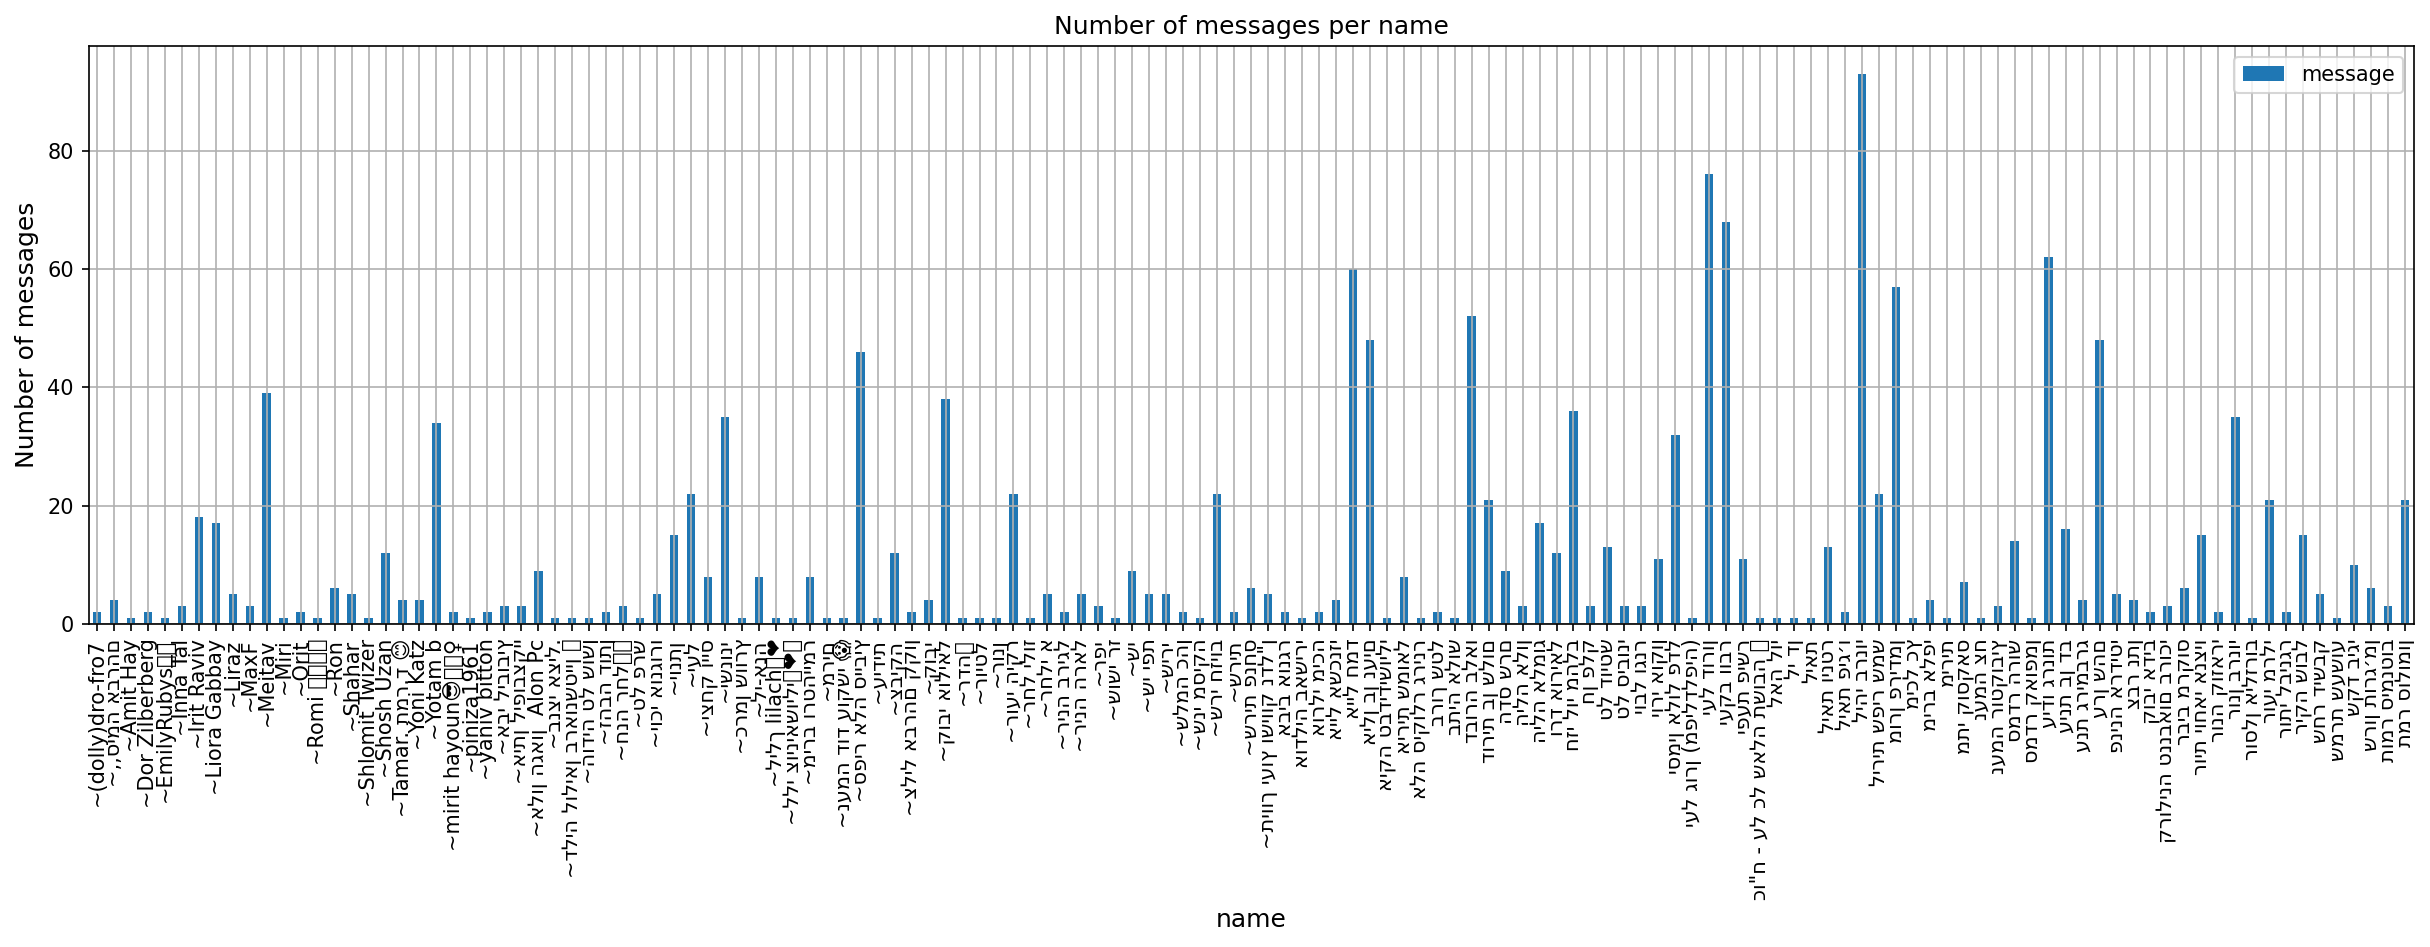

In [38]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
df_group.plot(x='name', y='message', kind='bar', legend=True, grid=True, figsize=(20, 5))
plt.title("Number of messages per name")
plt.ylabel('Number of messages', fontsize=12)
plt.xlabel('name', fontsize=12)

4) c) We can see from the plot that most activities user are likely to send more than 10 messages but non-activities users are more likely to send less than 5 messages.

I removed the non-activities users and created a new data frame.

In [39]:
unactivities_users = []
activities_users = []

for i, message in enumerate(df_group["message"]) :
    if message < 5:
        unactivities_users.append(df_group.iloc[i]["name"])
    else:
        activities_users.append(df_group.iloc[i]["name"])

print(f"{len(unactivities_users)} {len(activities_users)}")

# we got 75 unactivities users that only sended 10 or less message so we will see if we will remove them from the model at the future

75 62


4) d) Create a data frame from activities_users

In [40]:
activities_users_df = cleared_df.copy()

for i, name in enumerate(activities_users_df["name"]):
    if name in unactivities_users:
        activities_users_df.drop(i, inplace=True)


print(len(activities_users_df["name"].unique()))
activities_users_df = activities_users_df.reset_index(drop=True)

62


4) e) Now lets find our activities days at the chat.

In [41]:
df_group_days =  activities_users_df.copy()

for i, day in enumerate(df_group_days["day"]) :
    day =  str(day) + "." + str(df_group_days.iloc[i]["month"]) 
    df_group_days.at[i,"day"] = day

df_group_days = df_group_days.groupby("day")
df_group_days = df_group_days.agg({"message": "nunique"})
df_group_days = df_group_days.reset_index()
df_group_days    

,day,message
0,1.11,37
1,2.11,83
2,21.8,1
3,23.10,25
4,24.10,91
5,25.10,101
6,26.10,17
7,27.10,103
8,28.10,123
9,29.10,24


4) f) We can see that at 21.8, 8.10, and 11.7, only one message was sent, and because the chat was not active for a long time, we can conclude that those messages were not relevant for us, so I will remove them.

In [42]:
for i, month in enumerate(activities_users_df["month"]) :
    if month == 8 or month == 7:
        activities_users_df.drop(i, inplace=True)
        
    elif month == 10 and activities_users_df.iloc[i]["day"] == 8:
        activities_users_df.drop(i, inplace=True)

activities_users_df = activities_users_df.reset_index(drop=True)

In [43]:
activities_users_df = activities_users_df.dropna(subset=['message'])
activities_users_df = activities_users_df.drop_duplicates(subset=['message'])
activities_users_df = activities_users_df.reset_index(drop=True)
print(activities_users_df.info())
print(activities_users_df.head())
print(activities_users_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              1349 non-null   object  
 1   month             1349 non-null   int64   
 2   day               1349 non-null   int64   
 3   hour              1349 non-null   int64   
 4   message           1349 non-null   object  
 5   hour_bin          1349 non-null   category
 6   normalized_month  1349 non-null   float64 
 7   normalized_day    1349 non-null   float64 
 8   normalized_hour   1349 non-null   float64 
dtypes: category(1), float64(3), int64(3), object(2)
memory usage: 86.0+ KB
None
             name  month  day  hour  \
0       שחר דישבק     10   23     9   
1    חזי לוי מהלב     10   23     9   
2       שחר דישבק     10   23    10   
3  יסמין אלול פדל     10   23    10   
4    חזי לוי מהלב     10   23    10   

                                             messa

## Bag of words
5) a) For the next step, I'll create a bag of words and vectorize them with a count vectorizer.

*note:* I manually added another spotwords that I found.

In [44]:
def remove_stopwords(sent):
    stop_words_list = set(['א','ת','ז','4','ל','ש','ח','מ','1','2','ב','כ','ע','י','ו','ד','5','ס','ט','6','ר','3','ה','T','t','7','8','0','9','ג',
                       'שהוא', 'וגם', 'בכל', 'שכל','וכל', 'לכל', 'שהכל', 'מכל', 'הכל', 'וזה', 'ואם', 'שאין', 'ללא', 'זו', 'שיש', 'ולא', 'שלא', 'הזה',
                       'האם', 'שזה', 'למי', 'לזה', 'וכל', 'שאני', 'ואני',
                       'מישהו', 'חלק', 'יודע', 'שאפשר', 'כדאי', 'נראה', 'עכשיו', 'עבור', 'ברור', 'פשוט', 'תמיד', 
                        'תלוי', 'לגבי', 'לכולם', 'הבנתי', 'באופן', 'דברים', 'שיהיה', 'פעם', 'שנים', 'רוצה', 'בכלל', 
                        'בבקשה', 'דבר', 'הרבה', 'הכי', 'בדיוק', 'אחת', 'אלא',  'מספר', 'משהו', 'עוד', 'אשמח', 'מקבל',
                        'לפי', 'לעשות', 'ניתן', 'קשר', 'מתאים', 'מאוד', 'היום', 'כדי', 'לקבל', 'כמה', 'ממש', 'צריך', 
                        'כבר', 'אפשר', 'נכון', 'תודה', 'טוב', 'אחד'
                        ])

    stop_words = set(stopwords.words('hebrew'))
    stop_words = stop_words.union(stop_words_list)
    return ([word for word in sent if word not in stop_words])


5) b) Create a bag of words after removing stopwords.

In [45]:

tokenizer = nltk.RegexpTokenizer(r"\w+")
#tokenized_messages_list = [tokenizer.tokenize(sent) for sent in cleared_df["message"].tolist()]
tokenized_messages_list =[remove_stopwords(tokenizer.tokenize(sent)) for sent in activities_users_df["message"]]

5) c) Adding the bag of words (tokenized_messages_list) as another feature for the data frame.

In [47]:
activities_users_df["tokenized_messages"] = tokenized_messages_list

In [ ]:
activities_users_df = activities_users_df.dropna(subset=['message'])
activities_users_df = activities_users_df.drop_duplicates(subset=['message'])
activities_users_df = activities_users_df.reset_index(drop=True)
print(activities_users_df.info())
print(activities_users_df.head())
print(activities_users_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                1349 non-null   object  
 1   month               1349 non-null   int64   
 2   day                 1349 non-null   int64   
 3   hour                1349 non-null   int64   
 4   message             1349 non-null   object  
 5   hour_bin            1349 non-null   category
 6   normalized_month    1349 non-null   float64 
 7   normalized_day      1349 non-null   float64 
 8   normalized_hour     1349 non-null   float64 
 9   tokenized_messages  1349 non-null   object  
dtypes: category(1), float64(3), int64(3), object(3)
memory usage: 96.5+ KB
None
             name  month  day  hour   
0       שחר דישבק     10   23     9  \
1    חזי לוי מהלב     10   23     9   
2       שחר דישבק     10   23    10   
3  יסמין אלול פדל     10   23    10   
4    חזי לוי מהלב

## Count Vectorizer
6) a) After that I created a bag of words, now, I'll initialize a count vectorizer for a PCA model.

In [48]:
# Convert tokenized messages back to strings
tokenized_messages_strings = [' '.join(tokens) for tokens in activities_users_df["tokenized_messages"]]
# Count vectorization
count_vectorizer = CountVectorizer(token_pattern=r'\w+', max_features= 10000)
count_matrix = count_vectorizer.fit_transform(tokenized_messages_strings)
# Normalize the Count matrix
normalized_count_matrix = preprocessing.normalize(count_matrix, norm= 'l2')

# EDA
To visualize the data I used two models of EDA: 
* PCA
* word cloud

## PCA
7) a) 

The PCA model is initialized with two components, the bag of words after vectorization and normalization and the columns: normalized_month, normalized_day, normalized_hour.

 The PCA model was developed to visually represent the data and identify any outliers.

In [68]:
# Combine numerical features with Count vectors
combined_data = activities_users_df[['normalized_month', 'normalized_day', 'normalized_hour']].copy()
combined_data = np.hstack((combined_data, normalized_count_matrix.toarray()))

# Standardize the combined data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)

# Perform PCA
pca = PCA(n_components=2)  # Choose the number of components you want
pca_result = pca.fit_transform(scaled_data)

# Add PCA components to the DataFrame
activities_users_df['pca_1'] = pca_result[:, 0]
activities_users_df['pca_2'] = pca_result[:, 1]


<Figure size 1500x600 with 0 Axes>

Text(0.5, 1.0, 'PCA Components (Scatter Plot)')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

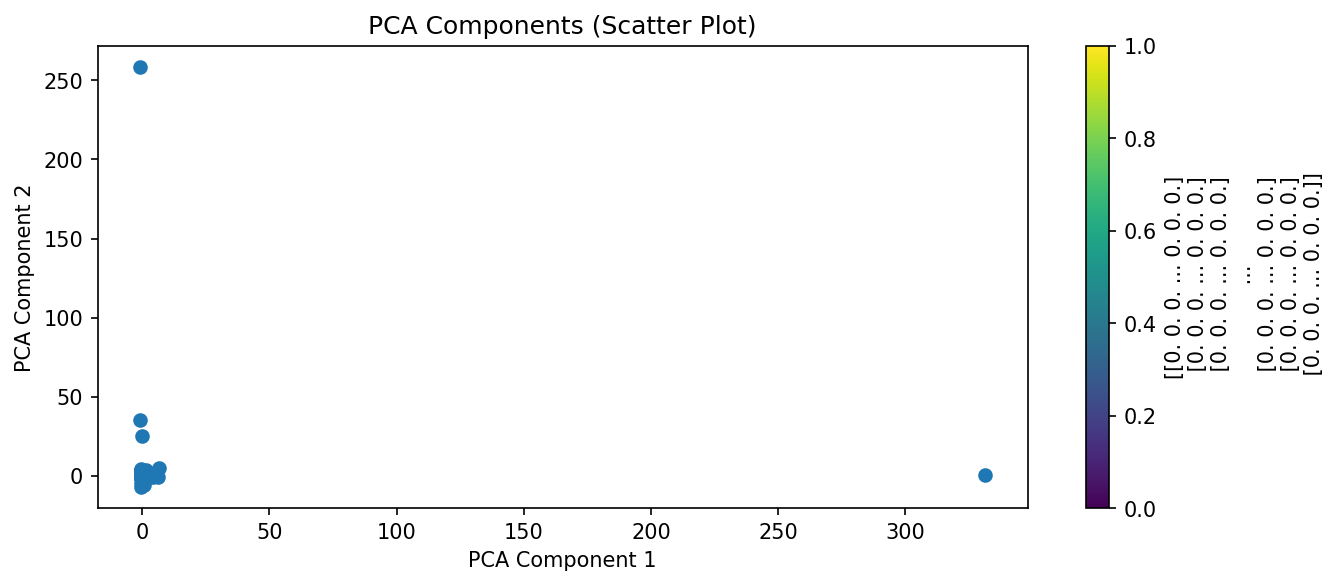

In [69]:
# Scatter plot of PCA components
plt.figure(figsize=(10, 4))
plt.scatter(activities_users_df['pca_1'], activities_users_df['pca_2'],  cmap='viridis')
plt.title('PCA Components (Scatter Plot)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label= normalized_count_matrix.toarray())
plt.show()

## removing more outleirs

7) b) I found more outliers i will remove them too with IQR method.

<Figure size 1500x600 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1d92c270950>,
 'caps': [<matplotlib.lines.Line2D at 0x1d92c270da0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1d92c270650>,
 'medians': [<matplotlib.lines.Line2D at 0x1d92c271370>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d92c271670>,
 'means': []}

Text(0.5, 1.0, 'Box Plot of PCA Components')

Text(0, 0.5, 'Values')

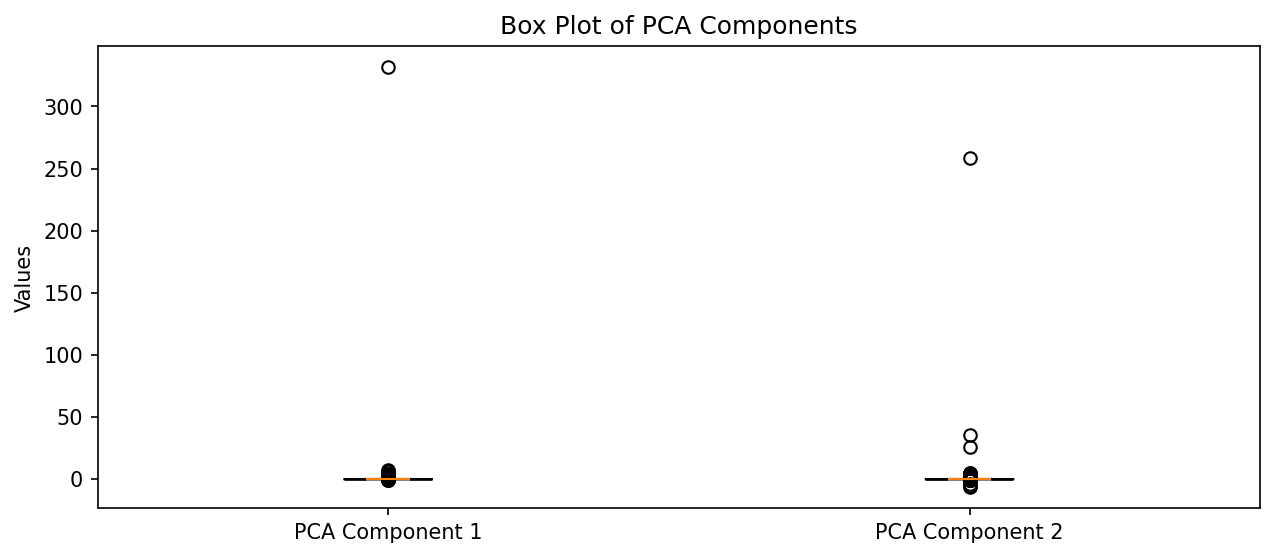

Outliers in PCA Component 1:
                name  month  day  hour  \
2          שחר דישבק     10   23    10   
17           ~שי יפת     10   23    21   
20    לירית שפיר שמש     10   23    21   
24      ~קובי אוליאל     10   23    21   
30        ~יצחק וייס     10   24    11   
...              ...    ...  ...   ...   
1314      ~רועי היקר     11    7    10   
1315            ~יעל     11    7    10   
1331       יעקב וובר     11    7    11   
1332   דורית בן שלום     11    7    11   
1344   דורית בן שלום     11    7    11   

                                                message hour_bin  \
2     אלא אם אתם מתעסקים בתמלול/תרגום דרך אח"א, חושש...        4   
17    כל מי שרוצה לכתוב לספיר אני מציע לשלוח לה בפרט...        4   
20    אני מצטרפת בכבוד להצעתו של @972546354144. \nנכ...        4   
24    אם אתם או מישהו קרוב אליכם תזדקקו לחילוץ, (נקו...        4   
30    קצת עוזר בטלויזיה.\nלא עוזר כלל בחברה וגם בעיה...        4   
...                                                 ...   

In [70]:

# Calculate IQR for each PCA component
q1_pca1, q3_pca1 = np.percentile(activities_users_df['pca_1'], [30, 70])
iqr_pca1 = q3_pca1 - q1_pca1
lower_bound_pca1 = q1_pca1 - 1.5 * iqr_pca1
upper_bound_pca1 = q3_pca1 + 1.5 * iqr_pca1

q1_pca2, q3_pca2 = np.percentile(activities_users_df['pca_2'], [30, 70])
iqr_pca2 = q3_pca2 - q1_pca2
lower_bound_pca2 = q1_pca2 - 1.5 * iqr_pca2
upper_bound_pca2 = q3_pca2 + 1.5 * iqr_pca2

# Identify outliers
outliers_pca1 = activities_users_df[(activities_users_df['pca_1'] < lower_bound_pca1) | (activities_users_df['pca_1'] > upper_bound_pca1)]
outliers_pca2 = activities_users_df[(activities_users_df['pca_2'] < lower_bound_pca2) | (activities_users_df['pca_2'] > upper_bound_pca2)]

# Plot box plots
plt.figure(figsize=(10, 4))
plt.boxplot([activities_users_df['pca_1'], activities_users_df['pca_2']],
             labels=['PCA Component 1', 'PCA Component 2'],
               notch=True, vert=True, patch_artist=True,)
plt.title('Box Plot of PCA Components')
plt.ylabel('Values')
plt.show()

# Print outliers
print("Outliers in PCA Component 1:")
print(outliers_pca1)
print("\nOutliers in PCA Component 2:")
print(outliers_pca2)

7) c) here I removed the outliers from the data frame.

<Figure size 1500x600 with 0 Axes>

{'whiskers': [<matplotlib.lines.Line2D at 0x1d92c2f02c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d92c273560>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1d92c2bbf80>,
 'medians': [<matplotlib.lines.Line2D at 0x1d92c2f05c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d92c2f0860>,
 'means': []}

Text(0.5, 1.0, 'Box Plot of PCA Components')

Text(0, 0.5, 'Values')

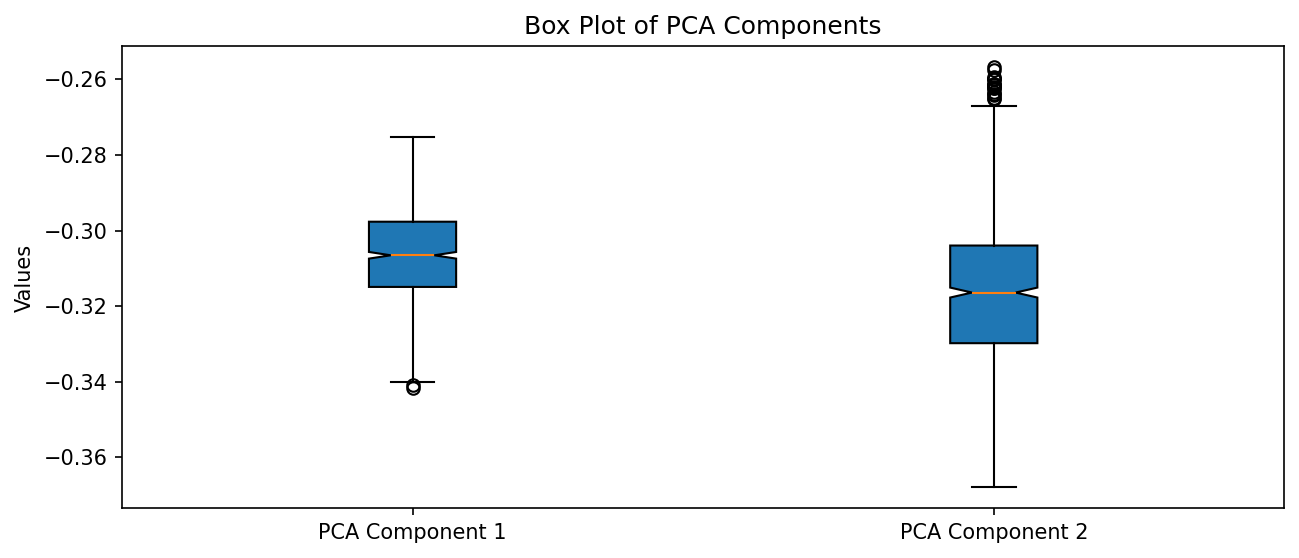

In [71]:
# Find the intersection of indices
indices_to_drop = outliers_pca1.index.intersection(activities_users_df.index)

# Remove outliers from PCA Component 1
activities_users_df = activities_users_df.drop(indices_to_drop)

# Find the intersection of indices
indices_to_drop = outliers_pca2.index.intersection(activities_users_df.index)

# Remove outliers from PCA Component 2
activities_users_df = activities_users_df.drop(indices_to_drop)

activities_users_df = activities_users_df.reset_index(drop=True)

# Plot box plots
plt.figure(figsize=(10, 4))
plt.boxplot([activities_users_df['pca_1'], activities_users_df['pca_2']],
             labels=['PCA Component 1', 'PCA Component 2'],
               notch=True, vert=True, patch_artist=True,)
plt.title('Box Plot of PCA Components')
plt.ylabel('Values')
plt.show()

7) d) Here I visualized again the PCA model.

<Figure size 1500x600 with 0 Axes>

Text(0.5, 1.0, 'PCA Components (Scatter Plot)')

Text(0.5, 0, 'PCA Component 1')

Text(0, 0.5, 'PCA Component 2')

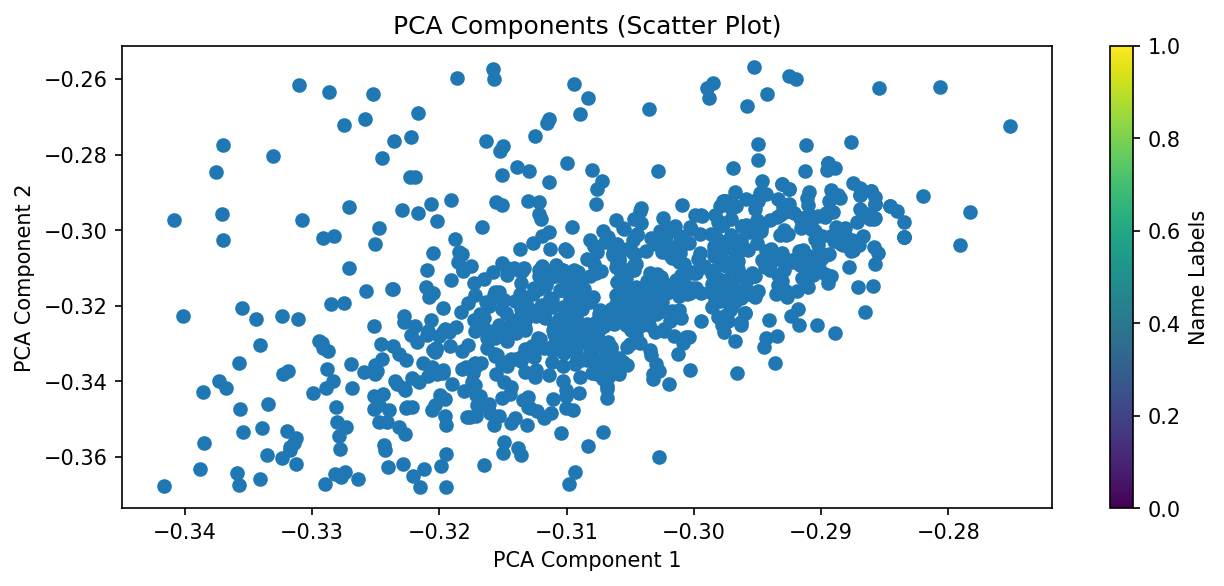

In [72]:
# Scatter plot of PCA components
plt.figure(figsize=(10, 4))
plt.scatter(activities_users_df['pca_1'], activities_users_df['pca_2'],  cmap='viridis')
plt.title('PCA Components (Scatter Plot)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Name Labels')
plt.show()

## Word Cloud
7) e) Here I visualized the bag of words with a word cloud.

Most common tokens:
[('העורף', 65), ('שעון', 62), ('שמיעה', 57), ('פיקוד', 48), ('אנשים', 45), ('רטט', 39), ('הרווחה', 36), ('לך', 34), ('אזעקה', 32), ('השעון', 32), ('חכם', 31), ('תקשורת', 30), ('שעונים', 27), ('החזר', 26), ('עידו', 25), ('התראה', 22), ('אפליקציה', 22), ('בזמן', 21), ('עובד', 21), ('האפליקציה', 21)]


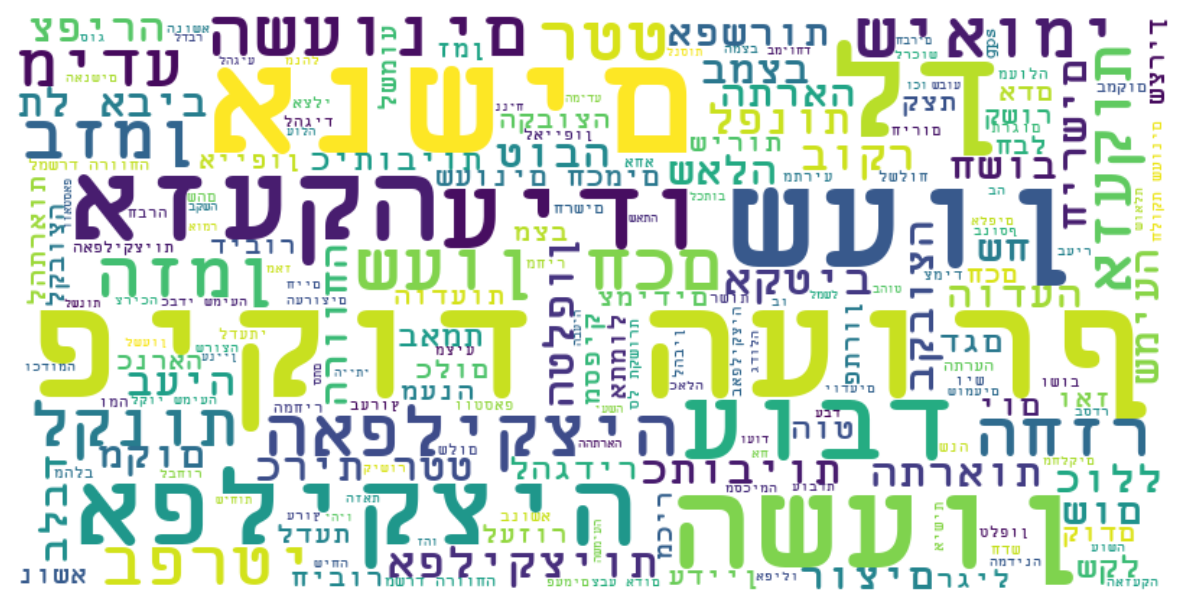

In [73]:
def word_cloud_printer(tokenized_messages_list):
    # Flatten the list of tokenized messages
    flattened_tokens = [token for message in tokenized_messages_list for token in message]

    # Token Frequency Analysis
    token_counts = Counter(flattened_tokens)
    most_common_tokens = token_counts.most_common(20)
    print("Most common tokens:")
    print(most_common_tokens)

    # Word Cloud Visualization
    wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\courbd.ttf',
                        width=800, 
                        height=400, 
                        background_color='white').generate(' '.join(flattened_tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

word_cloud_printer(tokenized_messages_list)

## Unsupervised learning

For the unsupervised learning, I used two models to clarify the results and get some points of view on the data.


## Vectorize for Unsupervised learning.
8) a) I initialized again a count vector for the tokenized_messages columns after I removed the outliers that I founded in the PCA model.
This count vector will be utilized in unsupervised learning models.

In [274]:
# Convert tokenized messages back to strings
tokenized_messages_strings = [' '.join(tokens) for tokens in activities_users_df["tokenized_messages"]]
# Count vectorization
count_vectorizer = CountVectorizer(token_pattern=r'\w+', max_features= 520, ngram_range=(1,5))
count_matrix = count_vectorizer.fit_transform(tokenized_messages_strings)
# Normalize the count matrix
normalized_count_matrix = preprocessing.normalize(count_matrix, norm= 'l1')

### Correlation matrix
8) b) 

Before I started with the models, I first made a correlation matrix to remove columns with high correlation.

At the next metrix, I found that there's a high correlation between the columns normalized_month and normalized_day (-0.983).

As a result, I removed the normalized_month column.

In [275]:
# Calculate the correlation matrix
correlation_matrix = activities_users_df[['normalized_month', 'normalized_day', 'normalized_hour', 'pca_1', 'pca_2']].corr()
correlation_matrix

,normalized_month,normalized_day,normalized_hour,pca_1,pca_2
normalized_month,1.000,-0.983,0.112,-0.511,-0.305
normalized_day,-0.983,1.000,-0.111,0.518,0.313
normalized_hour,0.112,-0.111,1.000,0.115,-0.284
pca_1,-0.511,0.518,0.115,1.000,0.497
pca_2,-0.305,0.313,-0.284,0.497,1.000


### Kmeans++
8) c) The first model that I used is Kmeans++:
* *columns:* normalized_day, normalized_hour, normalized_count_matrix(the bag of words after vectorization and normalization)
* Hyper parameters: init='k-means++', n_clusters=(range(2,11))

In [276]:
Kmeans_dict = {
    'Kmeans': [],
    'X_numerical' : [],
    'X_combined' : [] ,
    'cluster_labels' : [] ,
    'cluster_counts' : [] ,
    'silhouette_avg' : [] 
}

for num_clusters in range(2,11): # Define the number of clusters

    # Initialize KMeans with k-means++ initialization method
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
    
    #Creating a dataset from the bag of words and the other features.
    X_numerical = activities_users_df[['normalized_day', 'normalized_hour']]
    X_combined = np.hstack((X_numerical, normalized_count_matrix.toarray()))

    # Fit the KMeans model to the dataset.
    kmeans.fit(X_combined)

    # Get cluster labels for each message
    cluster_labels = kmeans.labels_

    # Count the number of occurrences of each cluster label
    cluster_counts = Counter(cluster_labels)

    # Evaluate clustering performance with silhouette score
    silhouette_avg = silhouette_score(normalized_count_matrix, cluster_labels)
    print("Silhouette Score:", silhouette_avg)

    Kmeans_dict['Kmeans'].append(kmeans)
    Kmeans_dict['X_numerical'].append(X_numerical)
    Kmeans_dict['X_combined'].append(X_combined)
    Kmeans_dict['cluster_labels'].append(cluster_labels)
    Kmeans_dict['cluster_counts'].append(cluster_counts)
    Kmeans_dict['silhouette_avg'].append(silhouette_avg)




KMeans(n_clusters=2)

Silhouette Score: 0.00072531772895863


KMeans(n_clusters=3)

Silhouette Score: -0.009304020094325828


KMeans(n_clusters=4)

Silhouette Score: 0.0028072466506255615


KMeans(n_clusters=5)

Silhouette Score: 0.00717667917787984


KMeans(n_clusters=6)

Silhouette Score: -0.021852479862856933


KMeans(n_clusters=7)

Silhouette Score: -0.025917474385260906


KMeans()

Silhouette Score: -0.02607100083208478


KMeans(n_clusters=9)

Silhouette Score: -0.01220175099201337


KMeans(n_clusters=10)

Silhouette Score: -0.016705609047076898


8) d) The best silhouette score was achieved with eight clusters, and the model values were saved in the Kmeans_dict for future use.

In [277]:
max_index = Kmeans_dict['silhouette_avg'].index(max(Kmeans_dict['silhouette_avg'], key=abs))

# Print cluster centers
print("Cluster Centers:")
print(Kmeans_dict['Kmeans'][max_index].cluster_centers_)

# Count the number of occurrences of each cluster label
Kmeans_dict['cluster_counts'][max_index] = Counter(Kmeans_dict['cluster_labels'][max_index])

# Create a table to display the counts
print("Cluster Counts:")
print("Cluster\tNumber of Messages")
for cluster, count in Kmeans_dict['cluster_counts'][max_index].items():
    print(f"{cluster}\t{count}")

# Evaluate clustering performance with silhouette score
print("Silhouette Score:", Kmeans_dict['silhouette_avg'][max_index])

Cluster Centers:
[[ 0.00000000e+00  5.45454545e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.22424242e-01  7.77190083e-01  3.45454545e-03 ...  8.13151629e-19
  -9.75781955e-19  9.09090909e-04]
 [ 8.78240741e-01  7.69781145e-01  1.54320988e-03 ...  7.71604938e-04
  -1.30104261e-18  1.15740741e-03]
 ...
 [ 9.44444444e-02  4.88636364e-01  2.16840434e-19 ...  0.00000000e+00
  -1.08420217e-19  1.08420217e-19]
 [ 1.12000000e-01  4.05454545e-01  0.00000000e+00 ...  1.26984127e-03
   3.80952381e-03  1.90476190e-03]
 [ 1.29166667e-01  8.06818182e-01  0.00000000e+00 ... -5.42101086e-20
   0.00000000e+00  0.00000000e+00]]
Cluster Counts:
Cluster	Number of Messages
4	257
2	216
3	5
6	175
0	1
1	275
5	12
7	8
Silhouette Score: -0.02607100083208478


8) e) Visualizing the Kmeans++ model.

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'K-means++ Clustering')

Text(0.5, 0, 'Component 1')

Text(0, 0.5, 'Component 2')

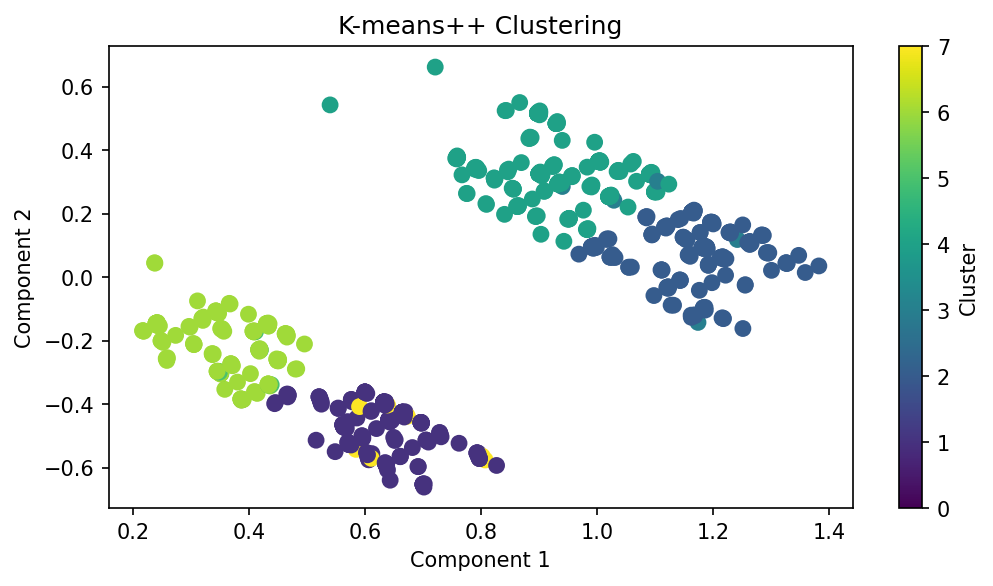

In [278]:
# Reduce the dimensionality of count matrix for visualization
svd = TruncatedSVD(n_components=2, random_state=42)
count_matrix_reduced = svd.fit_transform(Kmeans_dict['X_combined'][0])

# Plot the data points with cluster labels
plt.figure(figsize=(8, 4))
plt.scatter(count_matrix_reduced[:, 0], count_matrix_reduced[:, 1], c=Kmeans_dict['cluster_labels'][max_index], cmap='viridis', s=50)
plt.title('K-means++ Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

### GaussianMixture
8) f)

The second model is Gaussian mixture 
* *columns:* normalized_day, normalized_hour, normalized_count_matrix(the bag of words after vectorization and normalization)
* Hyper parameters: init='k-means++', n_components=(range(2,7)), covariance_type=["spherical", "tied", "diag", "full"]

In [279]:
#Creating a dataset from the bag of words and the other features.
X_numerical = activities_users_df[['normalized_day', 'normalized_hour']]
X_combined = np.hstack((X_numerical, normalized_count_matrix.toarray()))


8) g)

The function gmm_bic_score(estimator, X) returns the BIC score of the GaussianMixture model. I saved each model that I tested with its hyperparameters and its score in the grid_search dictionary.

In [280]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(X_combined)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x000001D9475AD4E0>)

8) h)

Create a table from the results to find the best hyperparameter.

The first row in the table represents the best hyperparameter according to the BIC score.

I found that covariance_type="spherical" and n_components=3 are the best hyperparameters.

In [281]:
df_GaussianMixture = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df_GaussianMixture["mean_test_score"] = -df_GaussianMixture["mean_test_score"]
df_GaussianMixture = df_GaussianMixture.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df_GaussianMixture.sort_values(by="BIC score")

,Number of components,Type of covariance,BIC score
2,3,spherical,-404698.460
5,6,spherical,-404401.609
4,5,spherical,-403196.827
3,4,spherical,-396782.514
1,2,spherical,-387986.839
0,1,spherical,-371395.395
12,1,diag,10873320.457
13,2,diag,12467082.836
14,3,diag,13151514.066
17,6,diag,13316508.791


8) i) 

Explanation about the BIC score:
* BIC = -2 * loglikelihood + d * log(N), where N is the sample size of the training set and d is the total number of parameters. 
* The lower BIC score signals a better model.

Visualization the hyperparameter BIC scores:

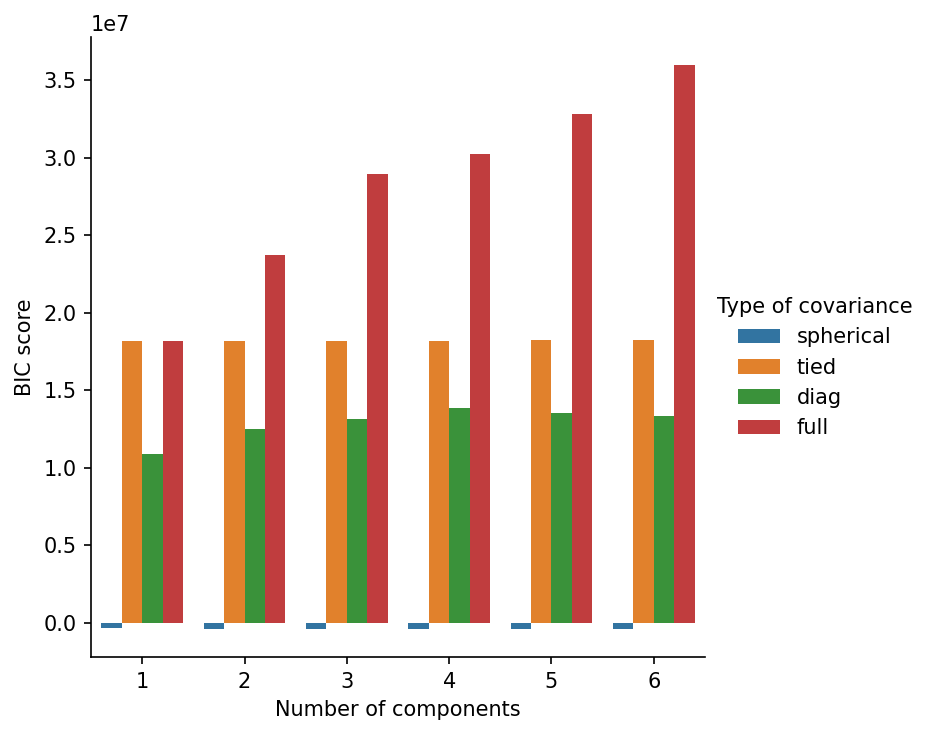

In [282]:
sns.catplot(
    data=df_GaussianMixture,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

8) i) 

Creating a GaussianMixture model from the best hyperparameters that I founded.

In [283]:

# Initialize GMM model
gmm = GaussianMixture(n_components=4, init_params='k-means++', covariance_type="spherical")  

# Fit the GMM model to the selected features
gmm.fit(X_combined)

# Predict the cluster labels for each data point
GaussianMixture_cluster_labels = gmm.predict(X_combined)

# Add the cluster labels to the dataframe
activities_users_df['GaussianMixture_cluster_labels'] = GaussianMixture_cluster_labels

# Visualize the cluster labels
print(activities_users_df[['GaussianMixture_cluster_labels']])

# Get the parameters of the GMM model
print("GMM means:\n", gmm.means_)
print("GMM covariances:\n", gmm.covariances_)
print("GMM weights:\n", gmm.weights_)

GaussianMixture(covariance_type='spherical', init_params='k-means++',
                n_components=4)

     GaussianMixture_cluster_labels
0                                 3
1                                 3
2                                 3
3                                 3
4                                 3
..                              ...
944                               1
945                               1
946                               1
947                               1
948                               1

[949 rows x 1 columns]
GMM means:
 [[5.33333333e-001 4.09090909e-001 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.17801418e-001 6.32495164e-001 2.02127660e-003 ... 4.72813239e-004
  1.41843972e-003 1.24113475e-003]
 [9.22222222e-001 7.27272727e-001 3.42666293e-267 ... 5.31888510e-206
  1.46939810e-314 5.27699118e-255]
 [8.86146273e-001 5.86689682e-001 7.03234880e-004 ... 3.51617440e-004
  5.27426160e-004 5.27426160e-004]]
GMM covariances:
 [0.00045382 0.00094456 0.00037612 0.00089445]
GMM weights:
 [0.00210748 0.49525817 0.00316122

8) j) Visualization for the GaussianMixture model.

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'GaussianMixture Clustering')

Text(0.5, 0, 'Component 1')

Text(0, 0.5, 'Component 2')

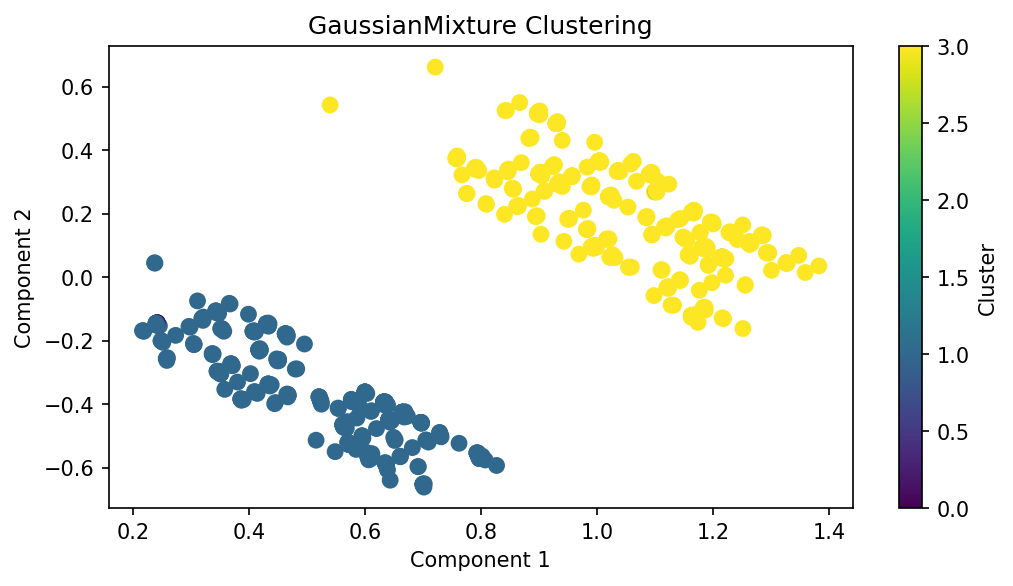

In [284]:
# Reduce the dimensionality of the count vector matrix for visualization
svd = TruncatedSVD(n_components=2, random_state=42)
count_vector_matrix_reduced = svd.fit_transform(X_combined)

# Plot the data points with cluster labels
plt.figure(figsize=(8, 4))
plt.scatter(count_vector_matrix_reduced[:, 0], count_vector_matrix_reduced[:, 1], c=GaussianMixture_cluster_labels, cmap='viridis', s=50)
plt.title('GaussianMixture Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Unsupervised learning results
Now we will print the results from the two unsupervised learning models.

9) a)

The unsupervised learning process will involve creating a dictionary with tokens and their clusters, then printing the clusters and the number of tokens in each cluster.

In [285]:
def create_cluster_tokens_df(cluster_labels, tokenized_messages_list):
    # Create a dictionary to store cluster labels and tokens
    cluster_tokens_dict = {'Cluster': [], 'Tokens': []}

    # Iterate over tokenized messages and cluster labels
    for cluster_label, tokens in zip(cluster_labels, tokenized_messages_list):
        cluster_tokens_dict['Cluster'].append(cluster_label)
        cluster_tokens_dict['Tokens'].append(tokens)

    # Convert the dictionary to a DataFrame
    cluster_tokens_df = pd.DataFrame(cluster_tokens_dict)

    return cluster_tokens_df


GaussianMixture_cluster_tokens_df = create_cluster_tokens_df(GaussianMixture_cluster_labels, tokenized_messages_list)
KmeansPP_cluster_tokens_df = create_cluster_tokens_df(Kmeans_dict["cluster_labels"][max_index], tokenized_messages_list)


In [286]:
def print_most_common_tokens(cluster_tokens_df, cluster_index):

    for cluster_value in range(0, cluster_index):

        cluster = cluster_tokens_df[cluster_tokens_df["Cluster"] == cluster_value]

        # Flatten the list of tokenized messages
        flattened_tokens = [token for message in cluster["Tokens"] for token in message]

        # Token Frequency Analysis
        token_counts = Counter(flattened_tokens)
        most_common_tokens = token_counts.most_common(10)
        print(f"cluster {cluster_value}, most common tokens:")
        print(most_common_tokens)

print("GaussianMixture clusters:")
print_most_common_tokens(GaussianMixture_cluster_tokens_df, df_GaussianMixture.sort_values(by="BIC score").iloc[0]['Number of components'])
print("\nKmeans++ clusters:")
print_most_common_tokens(KmeansPP_cluster_tokens_df, max(Kmeans_dict['cluster_counts'][max_index].keys())+1)


GaussianMixture clusters:
cluster 0, most common tokens:
[('שמכוונים', 1), ('שעון', 1), ('מעורר', 1), ('ואומרים', 1), ('זמן', 1), ('לצלצל', 1), ('שגם', 1), ('לזמן', 1), ('ההתראה', 1), ('שפיקוד', 1)]
cluster 1, most common tokens:
[('שעון', 23), ('העורף', 22), ('פיקוד', 17), ('חכם', 17), ('אנשים', 13), ('הרווחה', 13), ('שעונים', 12), ('עידו', 12), ('אזעקה', 11), ('השעון', 11)]
cluster 2, most common tokens:
[('מבינה', 2), ('שיבחר', 1), ('ברמה', 1), ('האישית', 1), ('ובזה', 1), ('תם', 1), ('הויכוח', 1), ('קבוצת', 1), ('טכנולוגיה', 1), ('כו', 1)]

Kmeans++ clusters:
cluster 0, most common tokens:
[('ןאם', 1), ('שומע', 1), ('בטלפון', 1), ('שיחות', 1), ('חזר', 1), ('אליך', 1), ('בדרכים', 1)]
cluster 1, most common tokens:
[('העורף', 17), ('שעון', 14), ('פיקוד', 13), ('חכם', 12), ('אזעקה', 11), ('הרווחה', 10), ('רטט', 9), ('אנשים', 8), ('השעון', 8), ('צמידים', 8)]
cluster 2, most common tokens:
[('שמיעה', 13), ('הכתוביות', 13), ('אנשים', 9), ('איכות', 9), ('העורף', 8), ('אזעקה', 8), ('עדיין',

## Main subjects
We can conclude that the main subjects that repeat themselves are:
* שעון/ שעון חכם
* משרד הרווחה/ משרד העבודה
* פיקוד העורף
* רטט
* אזעקה
* חירשים
* שיאומי
* אפליקציה

9) b)

The dataframe will be expanded with two additional columns: one for analyzing the message's sentiment and the other for indicating if the message is part of the mentioned subject, to determine if there is any correlation between the two columns.

In [287]:
main_subjects_dict = {
                    "clock": (["שעון", 'שעונים', 'שעון חכם', 'השעונים'], 1),
                    "vibration": (["רטט"], 2),
                    "shiomi": (["שיאומי"], 3),
                    "office": (['רווחה', 'עבודה', 'הרווחה', 'העבודה'], 4),
                    "alert": (["התראה","אזעקה", "צבע אדום"], 5),
                    "HFC": (["פיקוד", "העורף"], 6),
                    "deafness": (["חירש",'מוגבלות', "חירשים", "כבדי", "לקות", "אילם", "אילמת", "אילמים", "חירשות", "חירשת", "לקוי"], 7),   
                    "application": (["אפליקציה", 'האפליקציה', 'באפליקציה'], 8),
                    }                                    

In [288]:
main_subject_list = []

for token_list in activities_users_df["tokenized_messages"]:
    sub_list = []
    for token in token_list: 
        for subject in main_subjects_dict:
            if token in main_subjects_dict[subject][0]:
                sub_list.append(main_subjects_dict[subject][1])
    main_subject_list.append(sub_list)

activities_users_df["main_subject"] = main_subject_list

## Sentiment analysis
10) a) 

The analyze_sentiment function provides a sentiment analysis for each message in the dataframe.

In [289]:
sentiments_list = []
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

for message in cleared_df["message"]:
    sentiment = analyze_sentiment(message)
    if sentiment == 'Negative':
        print("Sentiment:", sentiment)
        sentiments_list.append(sentiment)
        print(message)
    elif sentiment == 'Positive':
        print("Sentiment:", sentiment)
        print(message)
        sentiments_list.append(sentiment)
    else:
        sentiments_list.append(sentiment)



Sentiment: Positive
הקישור הזה הודעה למי שיש לו free tv שמהיום ניתן לראות כתוביות בחדשות בערוצים 11, 12, 13, 14
Sentiment: Positive
free tv
Sentiment: Positive
צמיד כושר חכם דגם Xiaomi Smart Band 8
Sentiment: Positive
כנראה שפספסתי, לא נורא תודה :)
Sentiment: Negative
זה שיאומי דור 8 active?
אם כן
הרטט שלו חלש מאוד

8 רגיל או 7 רגיל ניתן לקבוע סוג רטט ולעשות חזק ביותר.
Sentiment: Positive
צמיד כושר חכם דגם Xiaomi Smart Band 8
מחלקים בעירייה תלוי במקומות שהודיעו שמחלקים.
ותבדקי עם קנייה שזה מתריע 
תורידי אפלקיצה כותמה/פיקוד העורף.ולבדוק שזה מתריע. 


We can see that the textblob can't work well with Hebrew, so I'll translate all the messages to English.

In [94]:

%pip install googletrans


  Using cached googletrans-3.0.0.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached httpx-0.13.3-py3-none-any.whl.metadata (25 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl.metadata (3.2 kB)
  Using cached idna-2.10-py2.py3-none-any.whl.metadata (9.1 kB)
  Using cached rfc3986-1.5.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached httpcore-0.9.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached h11-0.9.0-py2.py3-none-any.whl.metadata (8.1 kB)
  Using cached h2-3.2.0-py2.py3-none-any.whl.metadata (32 kB)
  Using cached hyperframe-5.2.0-py2.py3-none-any.whl.metadata (7.2 kB)
  Using cached hpack-3.0.0-py2.py3-none-any.whl.metadata (7.0 kB)
Using cached httpx-0.13.3-py3-none-any.whl (55 kB)
Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
Using cached httpcore-0.9.1-py3-none-any.whl (42 kB)
Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
Using cached h2-3.2.0-py2.py3-none-any.whl (65

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\chardetect.exe' -> 'c:\\Python312\\Scripts\\chardetect.exe.deleteme'


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [292]:
from deep_translator import GoogleTranslator


The translated messages were analyzed using the analyze_sentiment() function, and the results were incorporated into the analyze_sentiment column in the data frame.

In [293]:
sentiments_list = []
for i, message in enumerate(activities_users_df["message"]):
    try:
        translated = GoogleTranslator(source='hebrew', target='english').translate(message)
    except:
        translated  = None
    if translated == None:
        sentiments_list.append("Neutral")
    else:    
        sentiment = analyze_sentiment(translated)
        if sentiment == 'Negative':
            sentiments_list.append(sentiment)
        elif sentiment == 'Positive':
            sentiments_list.append(sentiment)
        else:
            sentiments_list.append(sentiment)

activities_users_df["analyze_sentiment"] = sentiments_list
        

## Conclusions

The next step is to compare the features we discovered and draw conclusions from them.

11) a) 

At first, I'll compare the main subjects and the sentiment analysis for each message to find out how the people in the group feel and react to each subject.

In [294]:
subject_sentiment_comparison_df = pd.DataFrame({"subject":[i for i in range(1,9)],
                                                 "Positive": [0] * 8,
                                                 "Negative": [0] * 8,
                                                 "Neutral": [0] * 8,})

for i, sub_list in enumerate(activities_users_df["main_subject"]):
    for subject in sub_list:
        subject_sentiment_comparison_df.at[subject-1 , activities_users_df.iloc[i]["analyze_sentiment"]] = subject_sentiment_comparison_df.at[subject-1 ,activities_users_df.iloc[i]["analyze_sentiment"]] + 1 

subject_sentiment_comparison_df.set_index('subject', inplace=True)
subject_sentiment_comparison_df

,Positive,Negative,Neutral
subject,,,
1,29,2,5
2,14,3,4
3,3,1,6
4,4,7,15
5,2,0,10
6,18,0,26
7,7,8,10
8,8,1,9


11) b) 

Visualization of the relationship between the sentiment analysis and the main subjects.

main subject map:

1. Smart watches
2. Vibrations 
3. Shiomi
4. government office 
5. Alart
6. HFC
7. deafness
8. Application

Text(0.5, 1.0, 'Sentiment Analysis by Subject')

Text(0.5, 0, 'Subject')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8')])

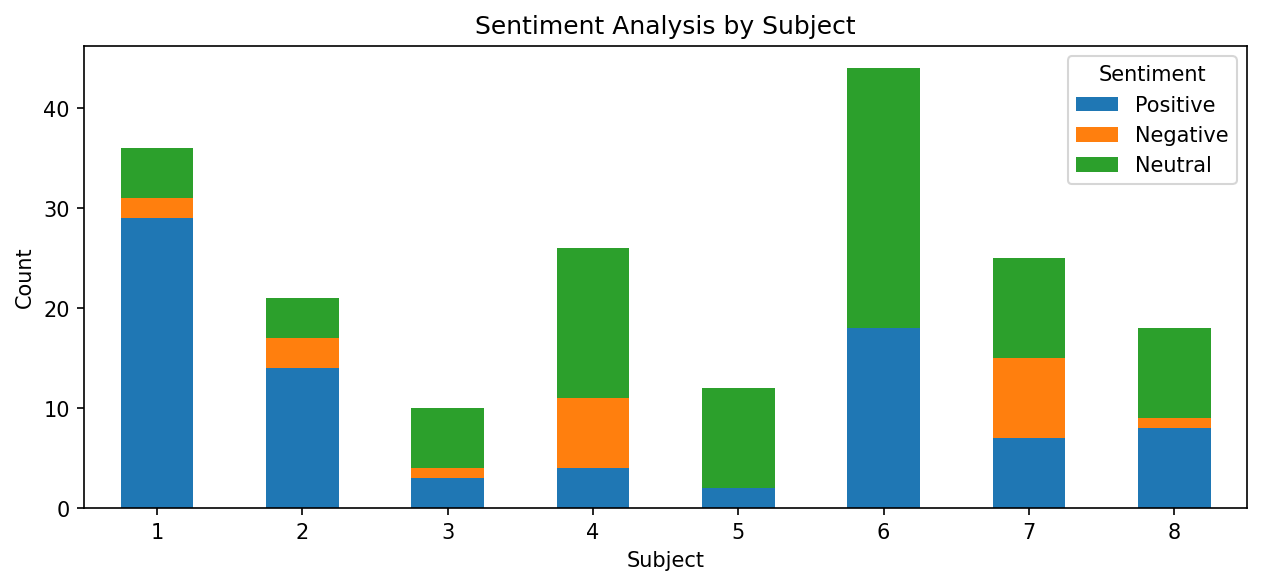

In [295]:
# Plot the data
ax = subject_sentiment_comparison_df.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.title('Sentiment Analysis by Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()

11) c)

From the visualization, we can conclude that the people in the chat group respond positively to the main subjects: smart watches, application and the Home Front Command (HFC), and respond negatively to the main subject: deafness.

The next comparison will focus on the hour feature and sentiment analysis to determine if the chat group responds more positively to messages during different hours or negatively.

In [296]:
sentiment_hour_comparison_df = pd.DataFrame({"hour":[i for i in range(1,5)],
                                                 "Positive": [0] * 4,
                                                 "Negative": [0] * 4,
                                                 "Neutral": [0] * 4,})

for i, hour in enumerate(activities_users_df["hour_bin"]):
    sentiment_hour_comparison_df.at[hour-1 , activities_users_df.iloc[i]["analyze_sentiment"]] = sentiment_hour_comparison_df.at[hour-1 ,activities_users_df.iloc[i]["analyze_sentiment"]] + 1 

sentiment_hour_comparison_df.set_index('hour', inplace=True)
sentiment_hour_comparison_df

,Positive,Negative,Neutral
hour,,,
1,3,2,9
2,121,37,199
3,112,48,254
4,40,13,111


Text(0.5, 1.0, 'Sentiment Analysis by Subject')

Text(0.5, 0, 'hour')

Text(0, 0.5, 'sentiment_Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

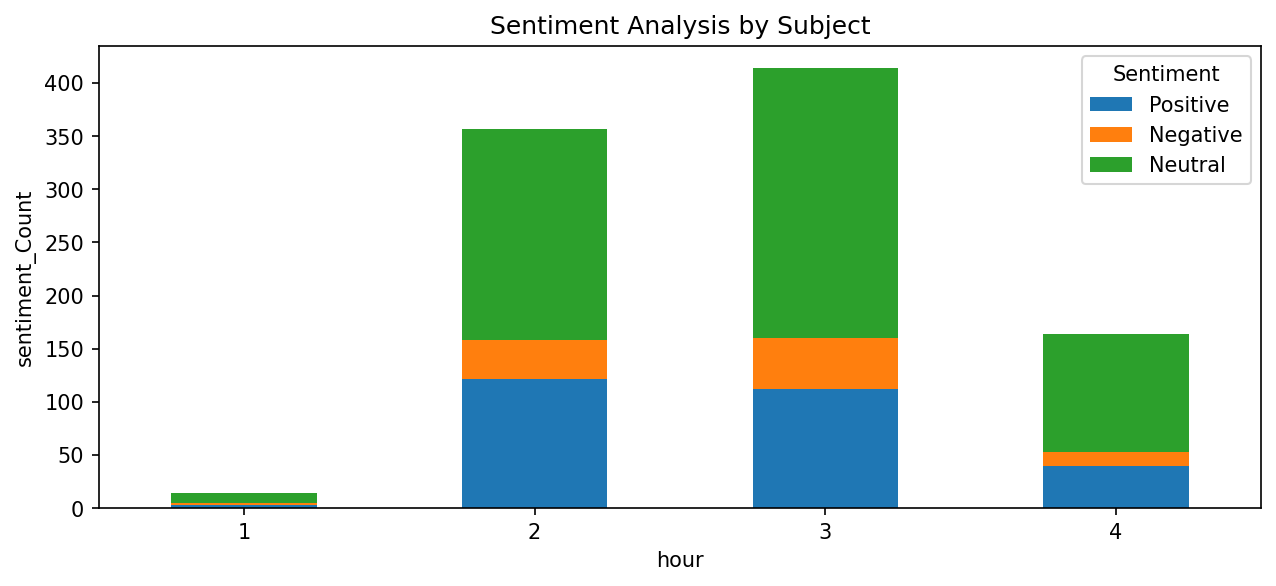

In [297]:
# Plot the data
bx = sentiment_hour_comparison_df.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.title('Sentiment Analysis by Subject')
plt.xlabel('hour')
plt.ylabel('sentiment_Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()

8) d)

The visualization indicates no significant difference in the time of day or response rates of the chat group.

The next comparison will be made between main subjects and day features to determine if the subject was discussed in the long or short term and at which stage.

In [298]:
activities_users_df["day"].unique()

array([23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7],
      dtype=int64)

In [299]:
subject_day_comparison_df = pd.DataFrame({"day":[i for i in range(1,17)],
                                                 1: [0] * 16,
                                                 2: [0] * 16,
                                                 3: [0] * 16,
                                                 4: [0] * 16,
                                                 5: [0] * 16,
                                                 6: [0] * 16,
                                                 7: [0] * 16,
                                                 8: [0] * 16,     
                                                 })

subject_day_comparison_df.set_index('day', inplace=True)
for i, sub_list in enumerate(activities_users_df["main_subject"]):
    for subject in sub_list:
        if activities_users_df.iloc[i]["month"] == 10:
            subject_day_comparison_df.at[activities_users_df.iloc[i]["day"]-22 , subject] = subject_day_comparison_df.at[activities_users_df.iloc[i]["day"]-22 ,subject] + 1 
        elif activities_users_df.iloc[i]["month"] == 11:
            subject_day_comparison_df.at[activities_users_df.iloc[i]["day"]+9 , subject] = subject_day_comparison_df.at[activities_users_df.iloc[i]["day"]+9 ,subject] + 1 

subject_day_comparison_df

,1,2,3,4,5,6,7,8
day,,,,,,,,
1,1,2,0,0,0,0,1,0
2,4,5,0,0,0,2,0,0
3,3,2,0,2,3,4,2,3
4,0,0,0,1,0,0,2,0
5,2,1,0,1,0,5,0,5
6,0,0,0,0,1,4,17,3
7,0,0,0,0,0,0,0,0
8,4,1,0,0,2,6,2,1
9,2,0,1,0,0,9,0,3


8) e) Visualization of the relationship between the day feature and the main subjects.

Text(0.5, 1.0, 'Data per Day')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Amount')

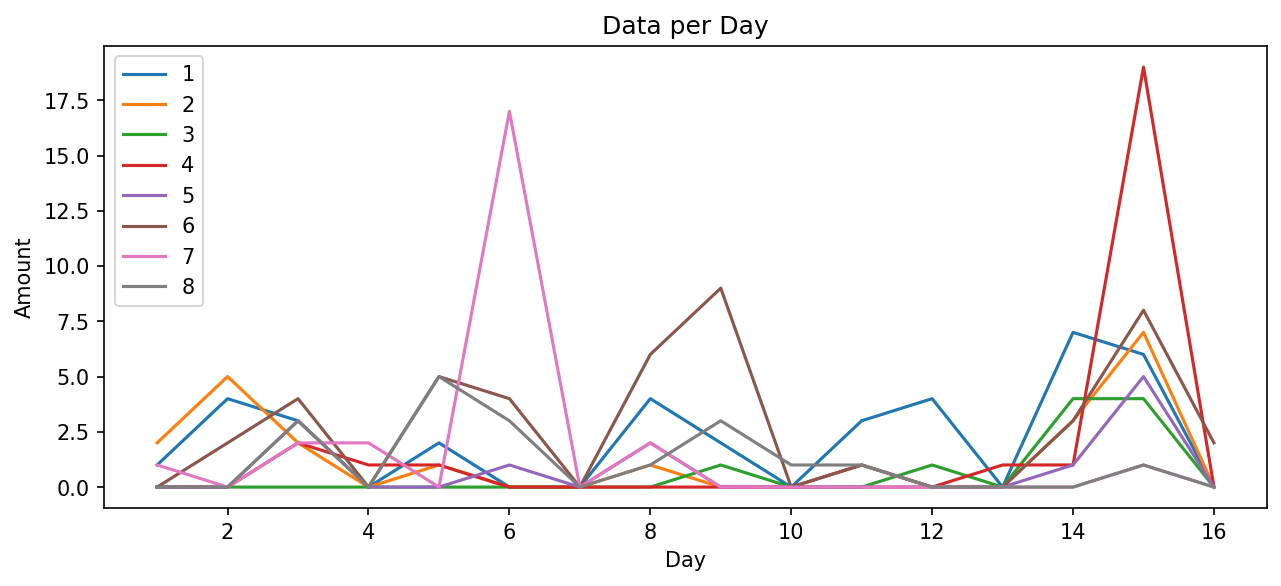

In [300]:
# Plot the data
ax = subject_day_comparison_df.plot(kind='line', figsize=(10, 4), linestyle='-')
plt.title('Data per Day')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.show()

8) f)

main subject map:

1. Smart watches
2. Vibrations 
3. Shiomi
4. government office 
5. Alert
6. HFC
7. deafness
8. Application

conclusions from the visualization:
1.	The alerts and the application subjects were discussed for a long-term at the first stage of the war.
2.	The deafness subject was discussed the most, but for a very short time.
3.	The smart watch subject was discussed during all the chat group time.
4.	At the middle stage, the HFC subject was discussed the most.
5.	At the last stage, the Shiomi subject was discussed not in a wide range but in the long term.
7.	At the last stage, the office government was discussed the most but for a short-term.
